In [1]:
%matplotlib inline
%time from hikyuu.interactive.interactive import *

Wall time: 51.1 s


In [2]:
#设定参数！！！！！

#回策回滚日期：减多少天，输入0为全部数据！
d_max = -500

#股票代码：shXXXXXX-上海，szXXXXXX-深圳
hz = 'sh000001' 

#固定每次买入1000股，买入策略权重分配。
num_max = 100

#初始资金量：100万
zj=1000000


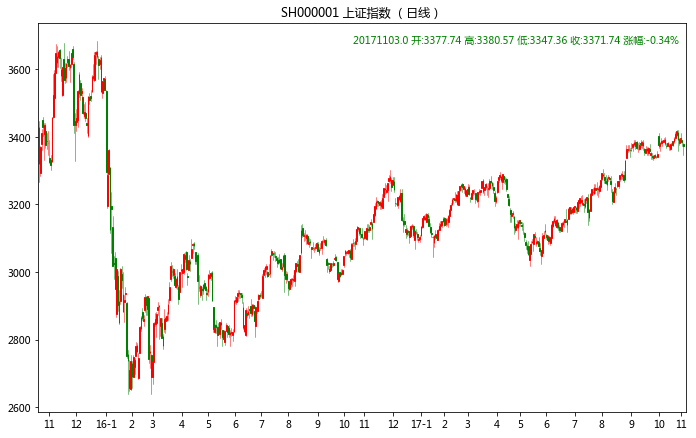

In [3]:
#显示数据绘制k线
s = sm[hz]
k = s.getKData(Query(d_max))
k.plot()

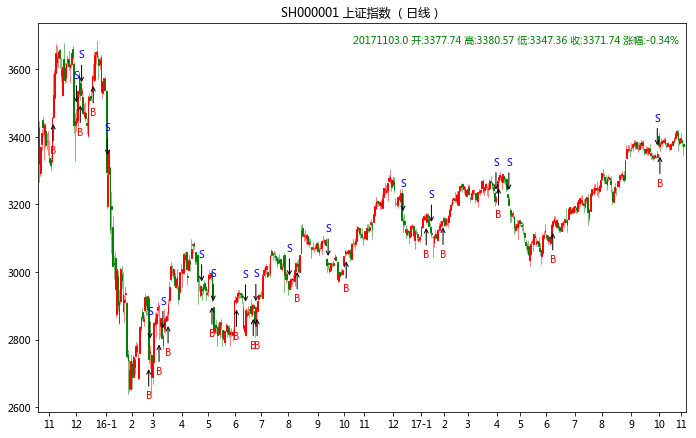

In [4]:

#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(initCash = zj)
#my_tm.plot()


#创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA最为慢线，
#快线向上穿越慢线时买入，反之卖出）
#vl.draw(s)
#my_sg = SMA
#(vl.draw(s, query=Query(d_max), ma1_n=5, ma2_n=10, ma3_n=20, ma4_n=60, ma5_n=100, ma_type="SMA", vma1_n=5, vma2_n=10))

my_sg = SG_Flex(OP(EMA(n=5)), slow_n=22)
#my_sg = SG_Flex(kf.draw(s)) #kf.draw(s)
#my_sg.plot()

#固定每次买入1000股
my_mm = MM_FixedCount(num_max)
#my_mm.plot()

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
#SMA = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
sys.run(sm[hz], Query(d_max))
#绘制系统信号
sys.plot()


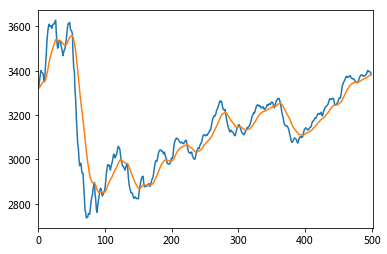

In [5]:

k = sm[hz].getKData(Query(d_max))
c = CLOSE(k)
fast = EMA(c, 5)
slow = EMA(fast, 22)
#绘制信号指示器使用两个指标
fast.plot(new=False)
slow.plot(new=False)


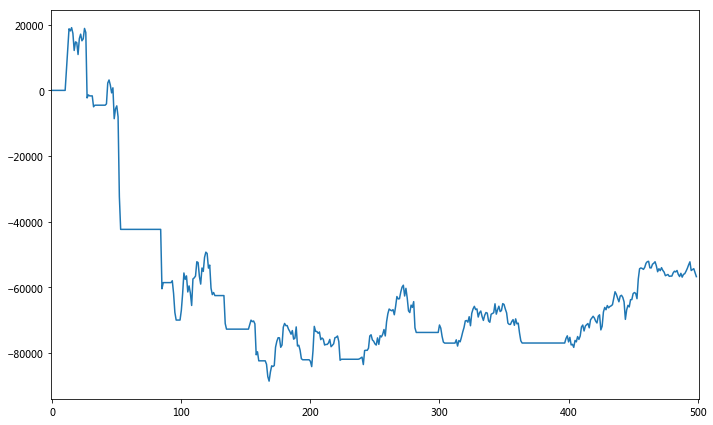

In [6]:

#绘制资金收益曲线
x = my_tm.getProfitCurve(k.getDatetimeList(), KQuery.DAY)
x = PRICELIST(x)
x.plot()


In [7]:
#回测统计
from datetime import datetime

per = Performance()
print(per.report(my_tm, Datetime(datetime.today())))


帐户初始金额: 1000000.00
累计投入本金: 1000000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 0.00
现金余额: 606088.00
未平仓头寸净值: 337174.00
当前总资产: 943262.00
已平仓交易总成本: 0.00
已平仓净利润总额: -56578.00
单笔交易最大占用现金比例%: 35.91
交易平均占用现金比例%: 33.20
已平仓帐户收益率%: -5.66
帐户年复合收益率%: -2.88
帐户平均年收益率%: -2.84
赢利交易赢利总额: 48373.00
亏损交易亏损总额: -104951.00
已平仓交易总数: 16.00
赢利交易数: 6.00
亏损交易数: 10.00
赢利交易比例%: 37.50
赢利期望值: -3536.12
赢利交易平均赢利: 8062.17
亏损交易平均亏损: -10495.10
平均赢利/平均亏损比例: 0.77
净赢利/亏损比例: 0.46
最大单笔赢利: 20384.00
最大单笔亏损: -37829.00
赢利交易平均持仓时间: 57.83
赢利交易最大持仓时间: 113.00
亏损交易平均持仓时间: 8.70
亏损交易最大持仓时间: 26.00
空仓总时间: 296.00
空仓时间/总时间%: 40.00
平均空仓时间: 18.00
最长空仓时间: 50.00
最大连续赢利笔数: 1.00
最大连续亏损笔数: 1.00
最大连续赢利金额: 20384.00
最大连续亏损金额: -69966.00
R乘数期望值: -0.01
交易机会频率/年: 8.01
年度期望R乘数: -0.08
赢利交易平均R乘数: 0.03
亏损交易平均R乘数: -0.03
最大单笔赢利R乘数: 0.06
最大单笔亏损R乘数: -0.11
最大连续赢利R乘数: 0.06
最大连续亏损R乘数: -0.22



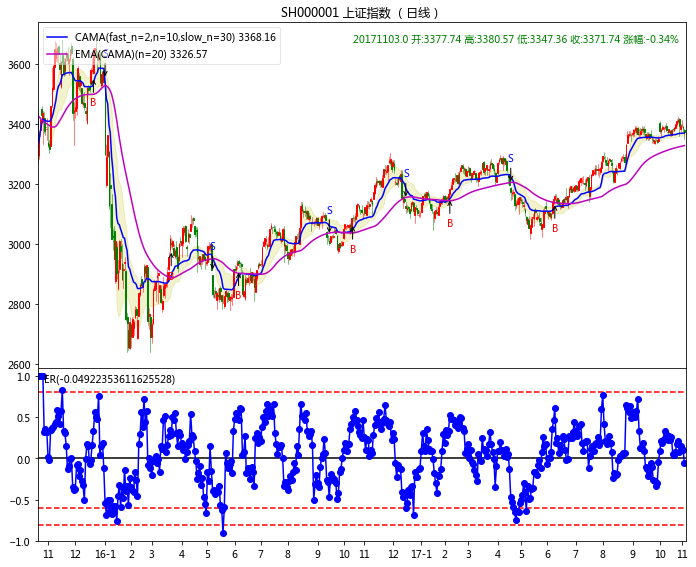

In [8]:
#kf.draw 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)

#kf.draw(s)
kf.draw(s, query=Query(d_max), n=10, filter_n=20, filter_p=0.1, sg_type = "CROSS", show_high_low=False, arrow_style=1)


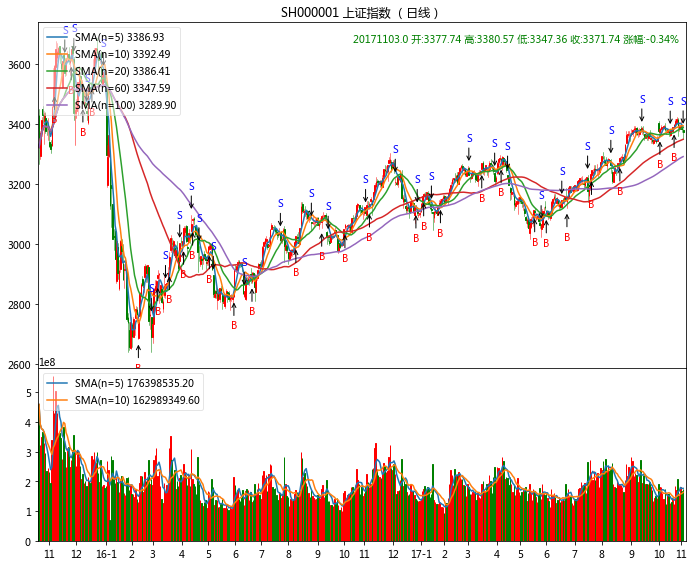

In [9]:
#vl.draw 绘制普通K线图 + 成交量（成交金额）

#vl.draw(s)
vl.draw(s, query=Query(d_max), ma1_n=5, ma2_n=10, ma3_n=20, ma4_n=60, ma5_n=100, ma_type="SMA", vma1_n=5, vma2_n=10)


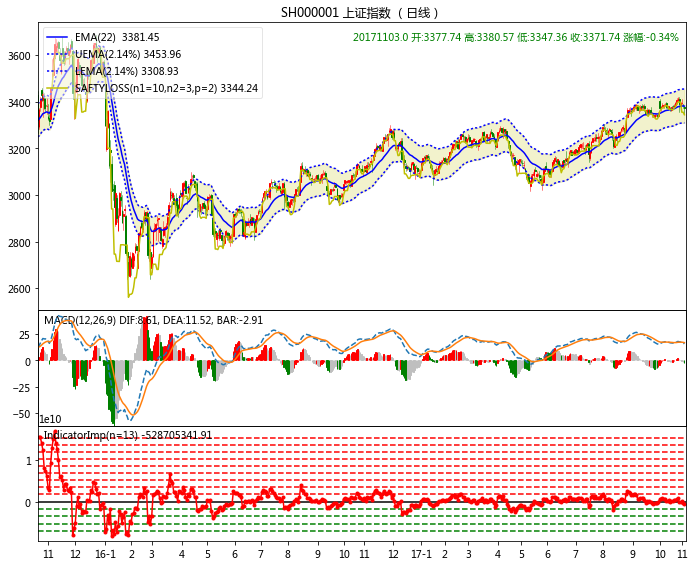

In [10]:
#el.draw 绘制亚历山大.艾尔德交易系统图形

#el.draw(s)
el.draw(s, query=QueryByIndex(d_max), ma_n=22, ma_w='auto', vigor_n=13)

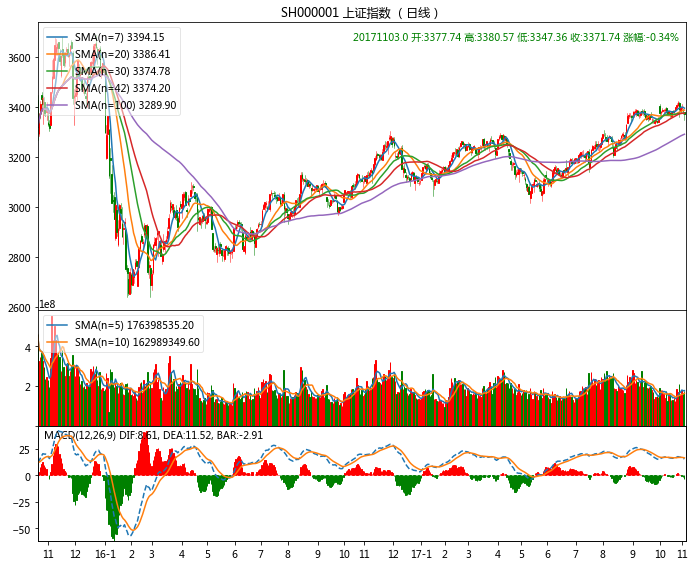

In [11]:
#vl.draw2 绘制普通K线图 + 成交量（成交金额）+ MACD

#vl.draw2(s)
vl.draw2(s, query=Query(d_max), ma1_n=7, ma2_n=20, ma3_n=30, ma4_n=42, ma5_n=100, vma1_n=5, vma2_n=10)

In [12]:
#kf.draw2 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)

#kf.draw2(blocka)
#kf.draw2(block, query=Query(d_max), ama1=AMA(n=10, fast_n=2, slow_n=30), ama2=None, n=10, filter_n=20, filter_p=0.1, sg_type='CROSS', show_high_low=True, arrow_style=1)

In [13]:
#vl.draw(s)
#vl.draw(s, query=Query(d_max), ma1_n=5, ma2_n=10, ma3_n=20, ma4_n=60, ma5_n=100, ma_type="SMA", vma1_n=5, vma2_n=10)
